In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import seaborn as sns
import random
from tensorflow.keras.datasets.mnist import load_data

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: P

In [2]:
!pip install python-mnist

In [3]:

from mnist import MNIST

mndata = MNIST('samples')

images, labels = mndata.load_testing()


index = random.randrange(0, len(images))
print(mndata.display(images[index]))

PermissionError: [Errno 13] Permission denied: 'samples\\t10k-labels-idx1-ubyte'

In [4]:
(image_train , label_train) , (image_test ,label_test) = load_data()

In [5]:
print(image_train.shape)
print(label_train.shape)
print(image_test.shape)
print(label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


1

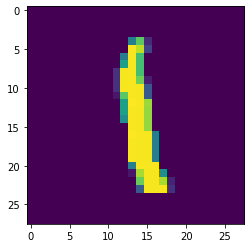

In [6]:
i = np.random.randint(1,len(image_train))
plt.imshow(image_train[i])
label_train[i]

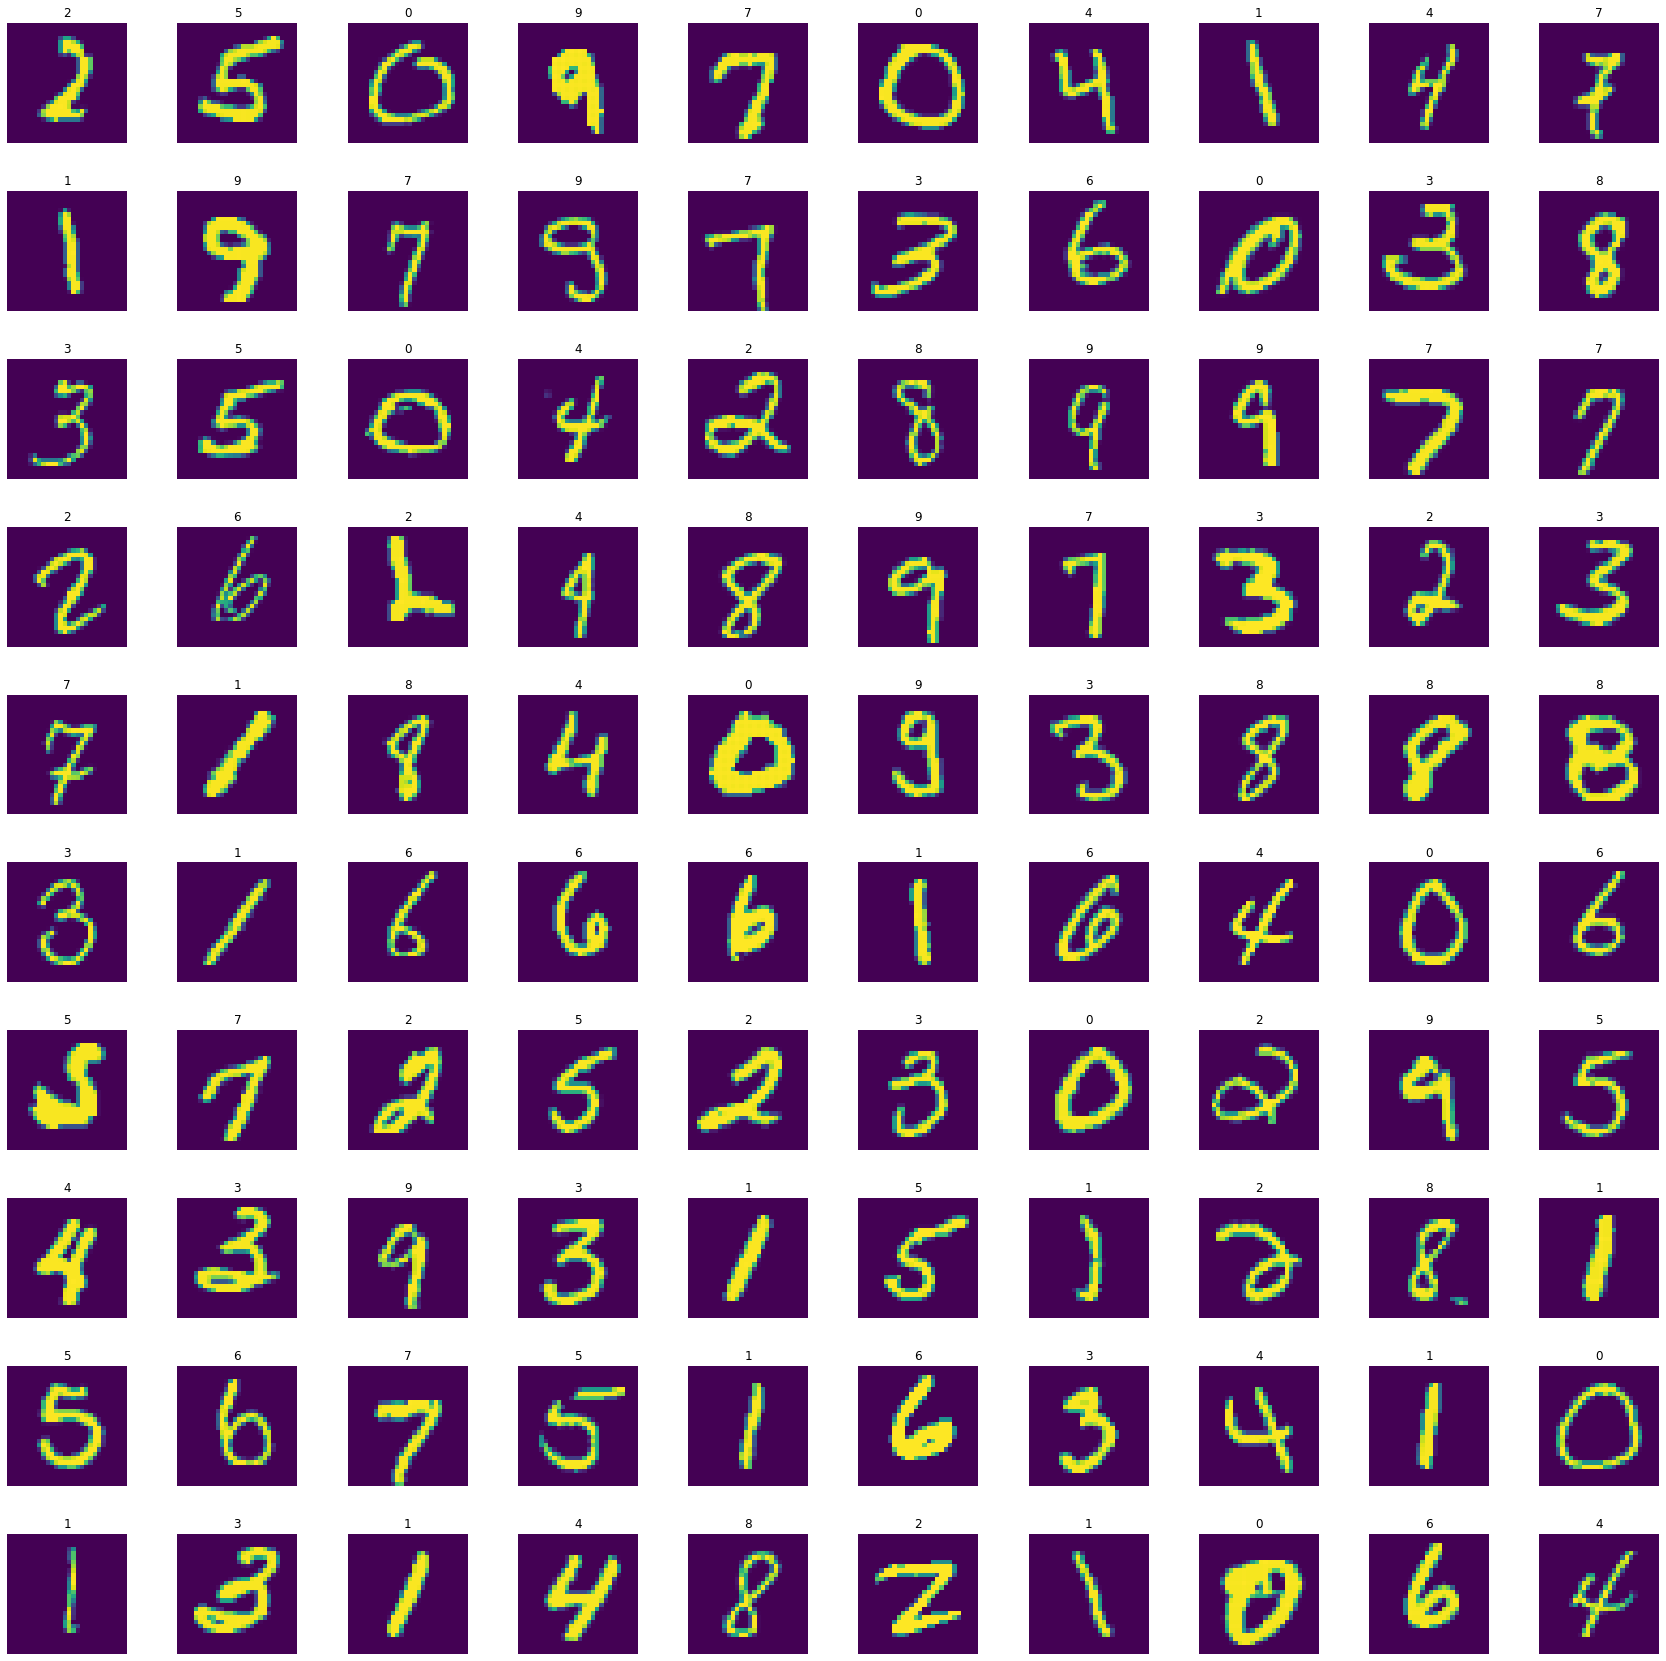

In [7]:
w_grid=10
l_grid=10


fig , axes=plt.subplots(l_grid,w_grid,figsize=(30,30))
axes = axes.ravel()

n_training = len(image_train)

for i in np.arange(0,l_grid*w_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(image_train[index])
    axes[i].set_title(label_train[index])
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)

* GreyScale images so to fit it CNN model we need to reshape it

In [8]:
from sklearn.utils import shuffle

image_train = image_train.reshape(image_train.shape[0], image_train.shape[1], image_train.shape[2], 1)
image_test = image_test.reshape(image_test.shape[0], image_test.shape[1], image_test.shape[2], 1)


* labels are vector which are having integers that are representing different categories, it can be converted into a matrix which has binary values and has columns equal to the number of categories in the data, so that we can apply the binary_crossentropy in the compiler loss function for better binary classification

In [9]:
num_classes = 10
bin_label_train = tf.keras.utils.to_categorical(label_train, num_classes)
bin_label_test = tf.keras.utils.to_categorical(label_test, num_classes)

label_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras import layers , models , datasets

* Filter taken (5*5)
* Padding is done for not losing the informations if at the corner of the images
* Strides given default value
* activation function is Relu for taking Relu at hidden layers and Sigmoid at the last layer as its a binary classification

In [11]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),padding="same",strides=(1, 1),activation="relu",input_shape=(28,28,1)))
CNN.add(layers.MaxPooling2D())


CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation="relu",input_shape=(24,24,1)))
CNN.add(layers.MaxPooling2D())

CNN.add(layers.Flatten())


CNN.add(layers.Dense(100,activation='relu'))
CNN.add(layers.Dense(50,activation='relu'))
CNN.add(layers.Dense(10,activation="softmax"))

CNN.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               4

* Checked with the label vector without converting it into the matrix and applying loss function as sparse_categorical_crossentropy

In [12]:
CNN.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = CNN.fit(image_train , label_train , batch_size=100, epochs=10,verbose =1)


Epoch 1/10
60000/60000 [==============================] - 21s 342us/sample - loss: 1.9030 - accuracy: 0.6939
Epoch 2/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.4664 - accuracy: 0.8710
Epoch 3/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.2829 - accuracy: 0.9190
Epoch 4/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.2007 - accuracy: 0.9407
Epoch 5/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1555 - accuracy: 0.9546
Epoch 6/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.1273 - accuracy: 0.9616
Epoch 7/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.1044 - accuracy: 0.9686
Epoch 8/10
60000/60000 [==============================] - 20s 330us/sample - loss: 0.0879 - accuracy: 0.9728
Epoch 9/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0785 - accuracy: 0.9760
Epoch 10/10
60000/6

In [13]:
score = CNN.evaluate(image_test,label_test )

10000/10000 [==============================] - 3s 264us/sample - loss: 0.0500 - accuracy: 0.9842


* Checked with the label vector with converting it into the matrix and applying loss function as binary_crossentropy

In [14]:
CNN.compile(optimizer='Adamax', loss='categorical_crossentropy',metrics=['accuracy'])

history = CNN.fit(image_train , bin_label_train , batch_size=100, epochs=10,verbose =1)

Epoch 1/10
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0646 - accuracy: 0.9798
Epoch 2/10
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0558 - accuracy: 0.9826
Epoch 3/10
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0511 - accuracy: 0.9838
Epoch 4/10
60000/60000 [==============================] - 20s 340us/sample - loss: 0.0472 - accuracy: 0.9850
Epoch 5/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0449 - accuracy: 0.9853
Epoch 6/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0430 - accuracy: 0.9858
Epoch 7/10
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0390 - accuracy: 0.9876
Epoch 8/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.0375 - accuracy: 0.9876
Epoch 9/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0353 - accuracy: 0.9883
Epoch 10/10
60000/6

In [15]:
score = CNN.evaluate(image_test,bin_label_test )

10000/10000 [==============================] - 3s 268us/sample - loss: 0.0362 - accuracy: 0.9886


### Accuracy obtained for image classification is 98% using CNN 